In [115]:
import networkx as nx
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def display_hist(data_dict, bins, title, axis=None, reverse=False):
    if axis is None:
        axis = plt
    data = sorted([v for v in data_dict.values()], reverse=reverse)
    axis.hist(data, bins)
    axis.set_title(title)
    if axis is None:
        plt.show()

In [117]:
# analyze the distributions of a graph and display them on graphs
def analyze_distribution(G, graph_name):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    #connected components size distribution
    component_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    print(f'Number of conneced components: {len(component_sizes)}')
    print(f'Connected component sizes: {component_sizes}')
    axes[0, 0].bar([str(i + 1) for i in range(len(component_sizes))], component_sizes)
    axes[0, 0].set_title(f'Connected components of {graph_name}')
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()
    #degree distribution
    display_hist({n:d for n, d in G.degree()}, 25, f'Degree distribution of {graph_name}', axes[0, 1], True)
    #clustering coefficient distribution
    display_hist(nx.clustering(G), 20, f'Clustering coefficient distribution of {graph_name}', axes[1, 0])
    #betweenness centrality distribution
    betweenness = nx.betweenness_centrality(G)
    display_hist(betweenness, 20, f'Betweeness centrality distribution of {graph_name}', axes[1, 1])
    plt.show()

In [118]:
# load original graph
mtx_file = "./socfb-Caltech36/socfb-Caltech36.mtx"

# read in the original matrix
matrix = scipy.io.mmread(mtx_file)  # Load matrix
G_original = nx.from_scipy_sparse_array(matrix)
# read in the erdos matrix
G_erdos = nx.read_gml('erdos_renyi_random.gml')
# read in the barabasi matrix
G_barabasi = nx.read_gml("barabasi_scale_free.gml")

Distribution analysis
Number of conneced components: 4
Connected component sizes: [762, 3, 2, 2]


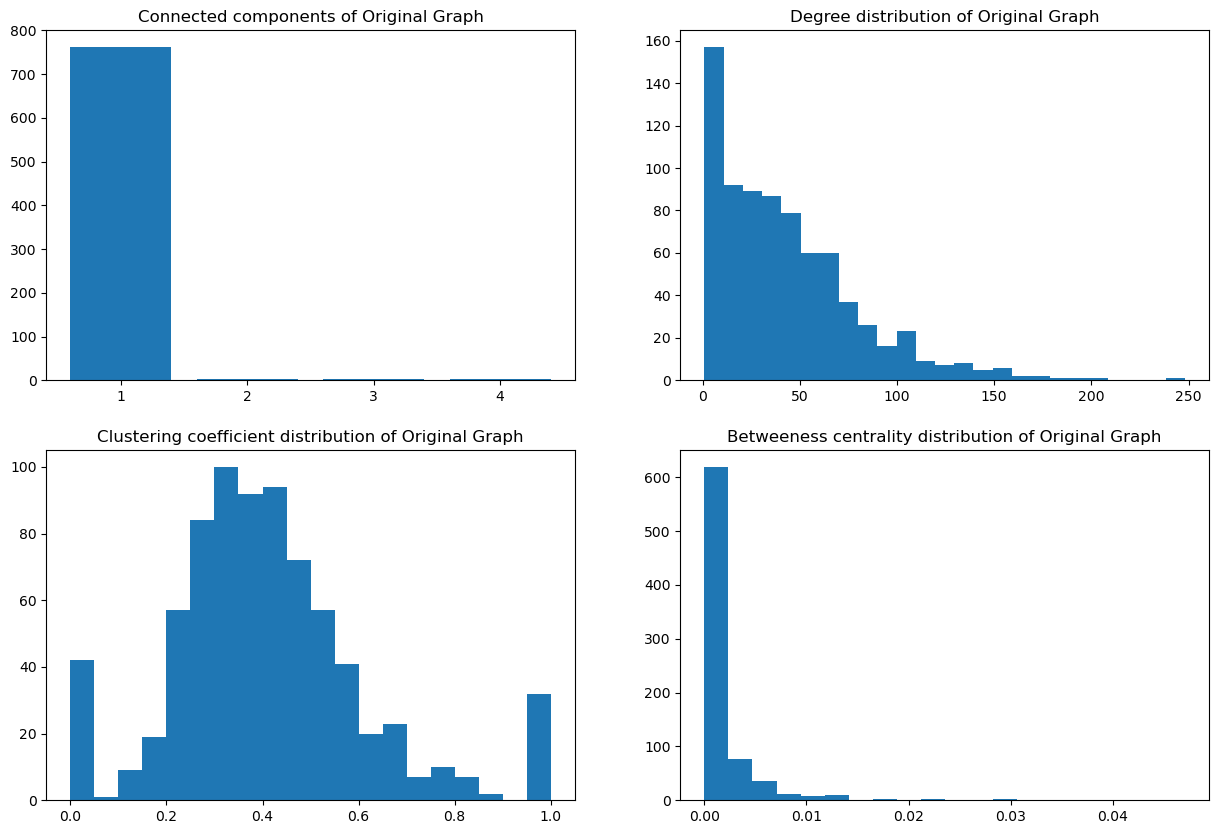

Number of conneced components: 1
Connected component sizes: [769]


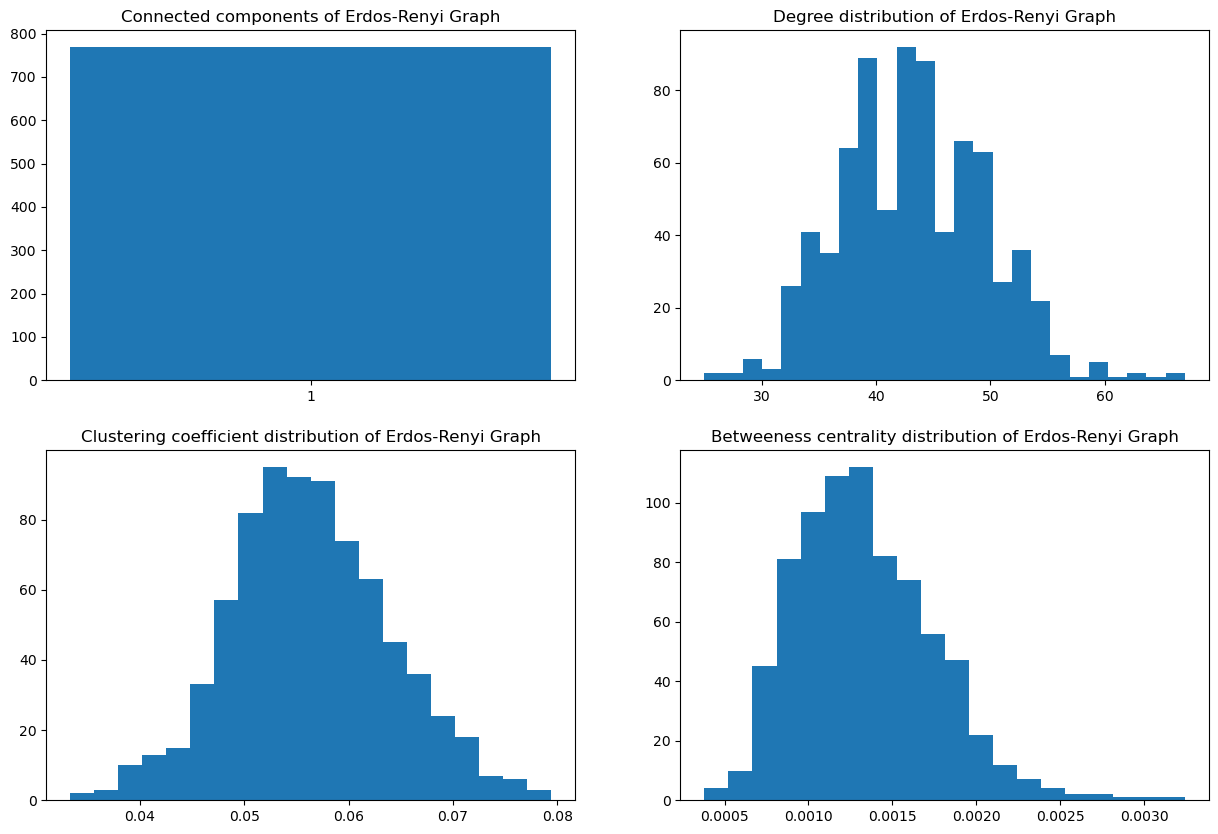

Number of conneced components: 1
Connected component sizes: [769]


In [ ]:
# analyze data
print("Distribution analysis")
analyze_distribution(G_original, 'Original Graph')
analyze_distribution(G_erdos, 'Erdos-Renyi Graph')
analyze_distribution(G_barabasi, 'Barabasi Graph')


In [ ]:
def top_n(centrality_dict, n):
    return sorted([(k, v) for k, v in centrality_dict.items()],reverse=True,key=lambda t: t[1])[:n]

# analyze the most important nodes in a graph and display the information
def analyze_centrality(G, graph_name):
    # get the largest connected component from the graph
    largest_cc = max(nx.connected_components(G), key=len)
    S = G.subgraph(largest_cc).copy()
    # calculate the four centralities
    degree = nx.degree_centrality(S)
    betweenness = nx.betweenness_centrality(S)
    closeness = nx.closeness_centrality(S)
    eigenvector = nx.eigenvector_centrality(S)
    # get the top n values
    N = 10
    degree = top_n(degree, N)
    betweenness = top_n(betweenness, N)
    closeness = top_n(closeness, N)
    eigenvector = top_n(eigenvector, N)
    # put the measures into a single tuple
    centralities = (degree, betweenness, closeness, eigenvector)
    # dipsplay them in a table
    # display the header
    middle = 'of the largest connected component of' if len(list(nx.connected_components(G))) > 1 else 'of'
    title = f'Centrality measures {middle} {graph_name}'
    print('{:^79s}'.format(title))
    print(('|'.join(['{:^19s}'] * 4)).format('Degree', 'Betweenness', 'Closeness', 'Eigenvector'))
    for i in range(N):
        # extract the values from the centralities tuple
        values = []
        for c in centralities:
            values.append(f'({c[i][0]})')
            values.append(c[i][1])
        print(('|'.join([' {:^6s} - {:.6f} '] * 4).format(*values)))
    print()

In [ ]:
analyze_centrality(G_original, 'Original Graph')
analyze_centrality(G_erdos, 'Erdos-Renyi Graph')
analyze_centrality(G_barabasi, 'Barabasi Graph')